In [5]:
# Import modules
import numpy as np
import pandas as pd
import nltk
# Set seed for reproducibility
np.random.seed(5)
# Read in IMDb and Wikipedia movie data (both in same file)
movies_df = pd.read_csv('./ok/movie_about.csv')
print("Number of movies loaded: %s " % (len(movies_df)))
# Display the data
movies_df

Number of movies loaded: 8051 


,電影ID,電影簡介
0,1,喬治戎格一生都在追求所謂的美國夢，也就是享受美好富裕的生活，但是他卻不願像他父親那樣一輩子都...
1,2,唐米尼杜洛托是洛城街頭賽車界的老大哥，他身邊有一群忠心耿耿的手下，他白天忙著組裝高性能跑車，...
2,3,美國空軍最高機密的隱形戰機驚傳失蹤！祕密訓練的飛行軍官傑克，被誣陷勾結恐怖組織，參與竊取戰機...
3,4,14世紀中古時期的社會階級分明，出身卑微的平民不論如何努力和奮鬥，都無法跨越階級制度而翻身致...
4,5,在【歡樂谷】、【危險性遊戲】挑大樑的瑞絲薇斯朋飾演【金法尤物】中飽受眾人歧視的金髮美女，因為...
...,...,...
8046,10810,年僅8歲的小女孩沙耶香，無法接受自己的愛狗小路已過世，某天她前往他們曾一起玩耍的秘密基地尋找...
8047,10811,★2019柏林影展特別放映（第69屆）★2019日舞影展（第35屆）★2019雪梨影展（第6...
8048,10812,★2020瑞典金甲蟲獎觀眾票選、最佳服裝設計、最佳化妝提名（第55屆）瑞典票房突破1億5千萬...
8049,10813,★2018美國超越電影節最佳國際長片評審團大獎★2018羅馬尼亞突破短片電影節最佳長片金象獎...


In [1]:
import pandas as pd
tag_df = pd.read_csv('movie_count_tag.csv')

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=50)
km.fit(tag_df)
clusters = km.labels_.tolist()
tag_df["cluster"] = clusters
tag_df['cluster'].value_counts()

6     207
32    204
20    202
33    197
24    197
5     197
13    196
23    195
26    194
34    192
27    191
0     189
7     189
46    188
9     188
48    188
39    188
15    188
30    187
25    186
49    185
2     184
38    183
14    183
3     178
21    175
11    173
37    171
28    170
18    170
45    169
29    169
4     154
41    153
16    139
8     137
42    136
36    125
17    122
44    120
43    119
12    117
19    111
47    110
35    105
31    100
1      95
22     85
10     77
40     73
Name: cluster, dtype: int64

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_distance = 1 - cosine_similarity(tag_df)

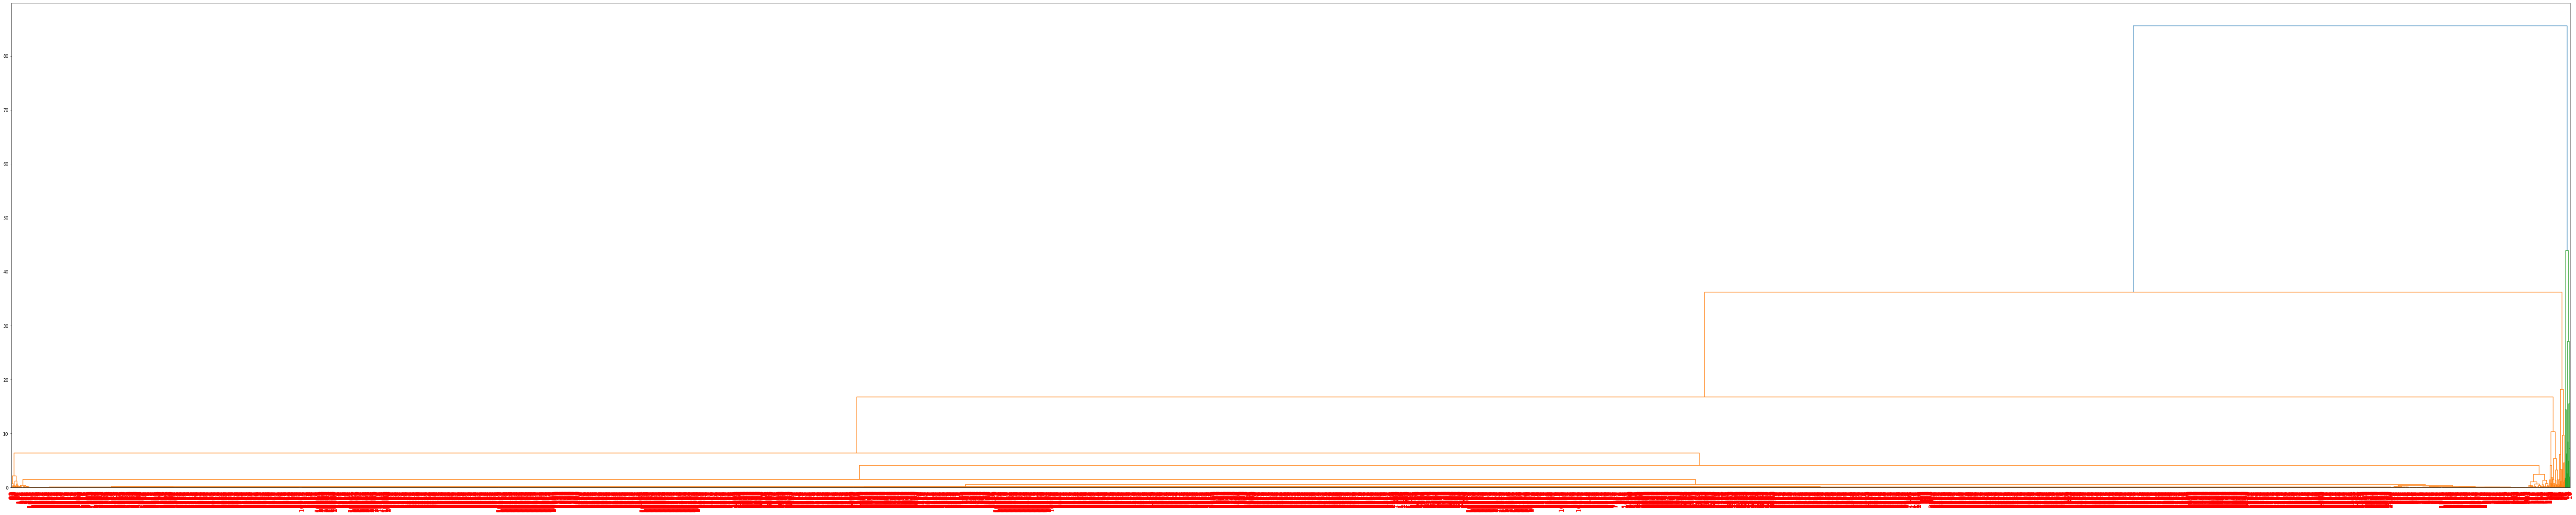

In [5]:
import matplotlib.pyplot as plt
# %matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(similarity_distance, method='complete')
dendrogram_ = dendrogram(mergings,
               labels=[x for x in tag_df["電影ID"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

plt.show()

